# Model Selection

Many times when we fit some model to our data we face the problem of choosing the optimal one out of a set of models. 
This scenario occurs either by different values of $\lambda$ in-front of a regularization term or by some innate 
"complexity knob" of the hypothesis class. These knobs are additional parameters, called hyper-parameters, that we should
fit a value for. By selecting what value we want we select the model our of the family of models.

In the following lab we will use Cross-Validation to fit a value of the hyper-parameter $k$ in the KNN classifier. 

The code below utilizes the South African Heart Disease dataset published by "The Elements of Statistical Learning" 
and is available here: https://web.stanford.edu/~hastie/ElemStatLearn//data.html

In [64]:
from google.colab import drive
drive.mount('/content/drive')
%cd "/content/drive/My Drive/Colab Notebooks/IML labs/"
!ls

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Colab Notebooks/IML labs
 Hitters.csv			      'Lab 05 - Polynomial Regression.ipynb'
 HittersDescription.csv		      'Lab 06 - BoostingBagging.ipynb'
'Lab 01 - Basic Sampling.ipynb'       'Lab 07 - Regularization.ipynb'
'Lab 02 - Linear Regression.ipynb'    'Lab 08 - Model Selection.ipynb'
'Lab 03 - Logistic Regression.ipynb'   SAheart.data
'Lab 04 - Decision Tree.ipynb'	       Untitled1.ipynb


In [65]:

import pandas as pd

df = pd.read_csv("SAheart.data", header=0, index_col=0).sort_values('chd')
df.famhist = df.famhist == "Present"
df.head()



,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
row.names,,,,,,,,,,
170,162,5.30,7.95,33.58,True,58,36.06,8.23,48,0
226,143,5.04,4.86,23.59,False,58,24.69,18.72,42,0
225,132,7.28,3.52,12.33,False,60,19.48,2.06,56,0
223,144,2.40,8.13,35.61,False,46,27.38,13.37,60,0
385,128,2.60,4.94,21.36,False,61,21.30,0.00,31,0


In [66]:
import numpy as np
from sklearn.model_selection import train_test_split 

np.random.seed(1)

train, test = train_test_split(df, test_size=0.2)
trainX, trainY, testX, testY = train.loc[:, train.columns != 'chd'], train["chd"], test.loc[:, test.columns != 'chd'], test["chd"]

print("After splitting, we got %d train samples and %d test samples" % (len(train), len(test)))


After splitting, we got 369 train samples and 93 test samples


# Fitting a $k$-NN Classifier

In [67]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=20).fit(trainX, trainY)
print("Train accuracy: %.2f.\nTest accuracy: %.2f" % ( knn.score(trainX, trainY), knn.score(testX, testY) ))


Train accuracy: 0.71.
Test accuracy: 0.63


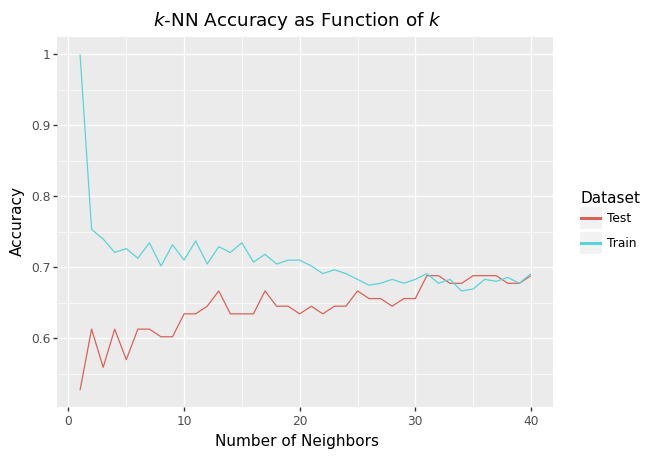

<ggplot: (-9223363303613589728)>

In [68]:
ks = range(1, 41)
train, test = [], []
for k in ks:
    knn = KNeighborsClassifier(n_neighbors=k).fit(trainX, trainY)
    train.append(knn.score(trainX, trainY))
    test.append(knn.score(testX, testY))

from plotnine import *
p = (ggplot(pd.melt(pd.DataFrame({"k": ks, "Train": train, "Test": test}), id_vars="k"), 
       aes(x="k", y="value", color="variable")) + 
 geom_line() + 
 labs(x="Number of Neighbors", y="Accuracy", color="Dataset", title=r"$k$-NN Accuracy as Function of $k$"))
p


# Cross Validation For Selecting $k$

Cross-Validation is a technique for assessment of an algorithm's generalization. We split our training data into fold, 
train our model on $n-1$ folds and test it on the $n$'th fold. We repeat the process over different selections of testing
(validation) folds. 

In the context of hyper-parameter optimization (i.e model selection) we perform the above for different values of the
hyper-parameter. When doing so we still need to determine what values of the hyper-parameter to check (for the $k$-NN
example, which values of $k$ to check).

Here too there are many techniques and heuristics: Suppose we had not 1 hyper-parameter but 10. Now suppose each hyper-
parameter resides in one of two values. This still means we have $2^{10}$ models we are comparing. Many times, especially
when using Neural Networks, we have many many hyper-parameters and each with many different possible values.

For the purposes of this course we will only consider the case of brute-force scanning all options, known as Grid Search.   

In [69]:
from sklearn.model_selection import GridSearchCV

# Specifying values to scan. Dictionary keys correspond to arguments passed to model's constructor.
param_grid = {'n_neighbors':ks}

# Perform the Cross-Validation (with 5 folds) over all combinations of parameter values specified in dictionary
knn_cv = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5).fit(trainX, trainY)

# The returned object has many interesting attributes and can be extended to include different objective functions.
# For more details see documentation: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
knn_cv.cv_results_



{'mean_fit_time': array([0.00290546, 0.00225959, 0.00229268, 0.00226502, 0.00226488,
        0.0026082 , 0.00223994, 0.00227256, 0.00223927, 0.00236049,
        0.00238686, 0.00224695, 0.0022974 , 0.00225868, 0.00223475,
        0.00223708, 0.00223413, 0.00223751, 0.00222998, 0.00272017,
        0.00226865, 0.00227189, 0.00241976, 0.00230889, 0.00227022,
        0.00222569, 0.00222416, 0.00223351, 0.00238585, 0.00232806,
        0.00229959, 0.00228076, 0.00230179, 0.00225506, 0.00229855,
        0.00273094, 0.00229268, 0.00233102, 0.00224838, 0.00224643]),
 'mean_score_time': array([0.00354619, 0.00351748, 0.00365977, 0.00360246, 0.00359221,
        0.00443974, 0.0036808 , 0.00362554, 0.00368328, 0.00383897,
        0.00388765, 0.00380545, 0.0037878 , 0.00376601, 0.00380373,
        0.00382309, 0.00385461, 0.00387201, 0.0039062 , 0.00438371,
        0.00388865, 0.00392346, 0.00405169, 0.00403252, 0.00401325,
        0.00392752, 0.00399146, 0.00404043, 0.00415063, 0.00409636,
        0.

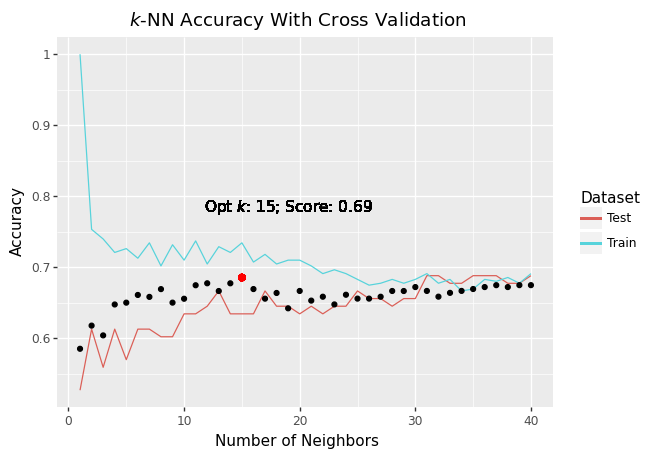

<ggplot: (-9223363303613570030)>

In [70]:
opt_k = knn_cv.best_params_["n_neighbors"]
opt_score = knn_cv.best_score_

(p + geom_point(data=pd.DataFrame({"k": ks ,"cv": knn_cv.cv_results_["mean_test_score"]}), 
               mapping=aes(x="k", y="cv"), color="black") + 
 geom_point(aes(x=opt_k, y=opt_score), color="Red", size=2) + 
 geom_text(label=r"Opt $k$: %d; Score: %.2f" % (opt_k, round(opt_score, 2)), x=opt_k + 4, y= opt_score + .1, color="black") +
 labs(title=r"$k$-NN Accuracy With Cross Validation"))


In [71]:
knn = KNeighborsClassifier(n_neighbors=opt_k).fit(trainX, trainY)
print("Train accuracy: %.2f.\nTest accuracy: %.2f" % ( knn.score(trainX, trainY), knn.score(testX, testY) ))


Train accuracy: 0.73.
Test accuracy: 0.63


# $\ell_1,\ell_2$ Regularization for Logistic Regression

In the following section we will fit a logistic regression model to the SA Hearts dataset, as we did in the logistic
regression lab. This time we will compare 3 types of fit: the ordinary, $\ell_1$ and $\ell_2$ logistic regressions.   

In [72]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression(solver="saga", tol=1e-4, max_iter=1e4).fit(trainX, trainY)
print("Train accuracy: %.2f.\nTest accuracy: %.2f" % ( lg.score(trainX, trainY), lg.score(testX, testY) ))


Train accuracy: 0.74.
Test accuracy: 0.63


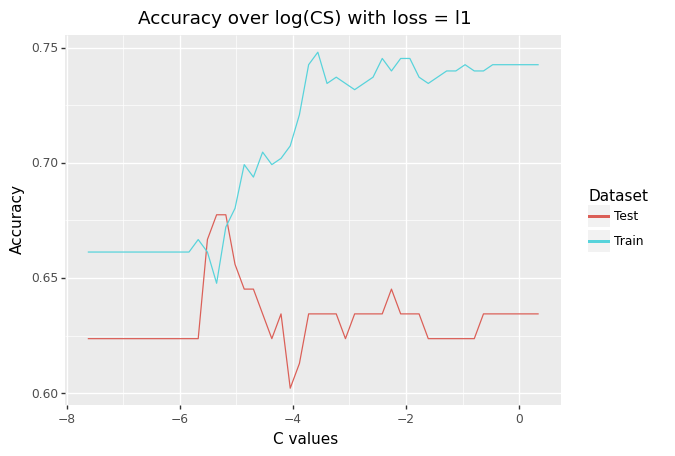

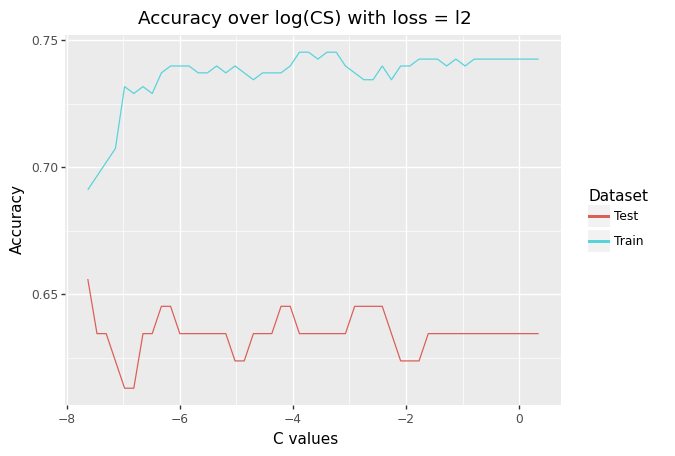

[<ggplot: (8733241576701)>, <ggplot: (8733241612061)>]

In [73]:
def plot_model_performance(penalty, Cs, trainX, trainY, testX, testY):
    """
    Given a penalty (regularization) type and a collection of C values to check, fit a penalized logistic regression 
    model for each over given training data. Then record scores over train and test in fitting arrays.
    :param penalty: Regularization type ("l1", "l2") 
    :param Cs: C values to check
    :param trainX: Design matrix to fit a model for
    :param trainY: Response vector to fit a model for
    :param testX: Design matrix to test model over
    :param testY: Response vector to test model over
    :return: A ggplot showing train and test scores of each fitted regularized model
    
    Hint: You already saw a graph like this earlier :)
    """
    train, test = [], []
    for c in Cs:
      logistic_reg = LogisticRegression(solver="saga", tol=1e-4, max_iter=1e4, penalty=penalty, C=c).fit(trainX, trainY)
      train.append(logistic_reg.score(trainX, trainY))
      test.append(logistic_reg.score(testX, testY))

    return (ggplot(pd.melt(pd.DataFrame({"Cs": np.log(Cs), "Train": train, "Test": test}), id_vars="Cs"), 
                aes(x="Cs", y="value", color="variable")) + geom_line() + 
       labs(x="C values", y="Accuracy", color="Dataset", title=r"Accuracy over log(CS) with loss = " + penalty))


Cs = 2**np.linspace(-11,.5, 50)
l1_p = plot_model_performance("l1", Cs, trainX, trainY, testX, testY)
l2_p = plot_model_performance("l2", Cs, trainX, trainY, testX, testY)

[l1_p, l2_p]

In [0]:
from sklearn.linear_model import LogisticRegressionCV

# Complete the implementation of the following function
def fit_logistic_regression_cv(penalty, Cs, x, y, cv=5):
    """
    Fit a regularized logistic regression model while applying cross-validation 
    :param penalty: Regularization type ("l1", "l2")
    :param Cs: Collection of regularization weights to check
    :param x: Design matrix to fit a model for
    :param y: Response vector to fit a model for
    :param cv: Number of cross-validation folds to use
    :return: Fitted model
    """
    lr =  LogisticRegressionCV(Cs=Cs,cv=cv, penalty=penalty, solver="saga", tol=1e-4, max_iter=1e4).fit(x,y)
    return lr

folds = 5
l1 = fit_logistic_regression_cv(penalty="l1", Cs=Cs, x=trainX, y=trainY, cv=folds)
l2 = fit_logistic_regression_cv(penalty="l2", Cs=Cs, x=trainX, y=trainY, cv=folds)


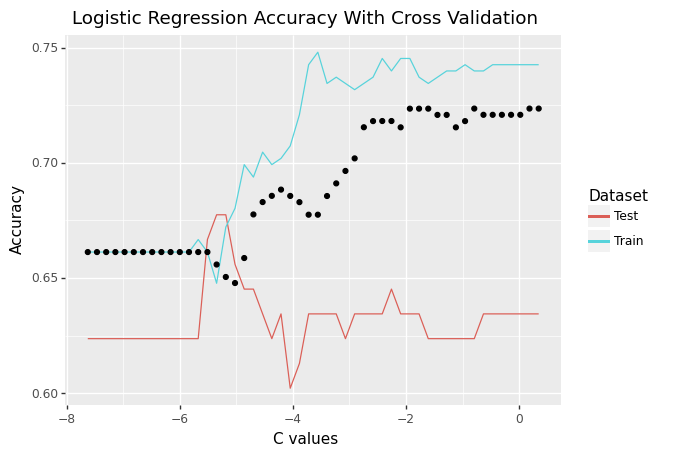

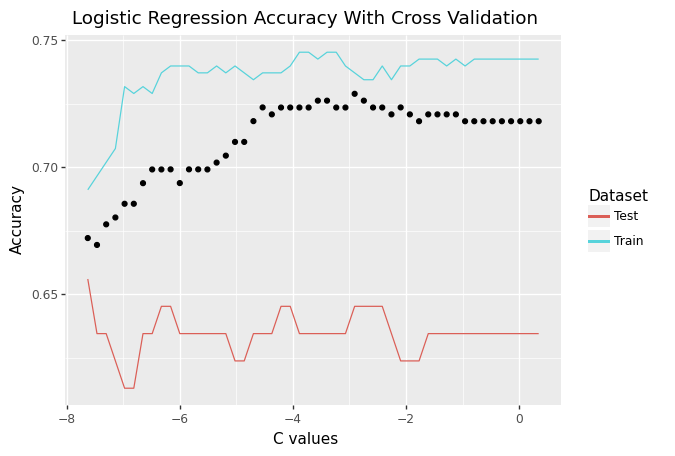

[<ggplot: (8733241534216)>, <ggplot: (8733241534314)>]

In [75]:
def append_cv_results(model, plot):
    """
    Given a trained CV model append to an existing plot the cross-validation results
    :param model: Fitted regularized with cross-validation logisitic regression model
    :param plot: Model's train and test scores as a function of the C value
    :return: The original plot with additional points (x,y) where x is the log of the matching C value and y the mean 
    score across all folds
    """
    scores = model.scores_[1]
    scores = np.sum(scores, axis=0) / 5 # mean of scores among all cv folds
    return (plot + geom_point(data=pd.DataFrame({"Cs": np.log(model.Cs_), "scores": scores}), 
                  mapping=aes(x="Cs", y="scores"), color="black") + 
    labs(title=r"Logistic Regression Accuracy With Cross Validation"))

[append_cv_results(l1, l1_p), append_cv_results(l2, l2_p)]



In [76]:
c1, c2 = l1.C_[0], l2.C_[0]
l1 = LogisticRegression(solver="saga", tol=1e-4, max_iter=1e4, C=c1, penalty="l1").fit(trainX, trainY)
l2 = LogisticRegression(solver="saga", tol=1e-4, max_iter=1e4, C=c2, penalty="l2").fit(trainX, trainY)

pd.DataFrame({"Algorithm:": ["Logistic Regression", "l1 Logistic Regression", "l2 Logistic Regression"],
              "C Value": [None, c1, c2],
              "Train Error": [lg.score(trainX, trainY), l1.score(trainX, trainY), l2.score(trainX, trainY)],
              "Test Error": [lg.score(testX, testY), l1.score(testX, testY), l2.score(testX, testY)]}) 


,Algorithm:,C Value,Train Error,Test Error
0,Logistic Regression,NaN,0.742547,0.634409
1,l1 Logistic Regression,0.452862,0.739837,0.623656
2,l2 Logistic Regression,0.054641,0.737127,0.645161
